In [1]:
import speech_recognition as sr 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df= pd.read_csv("voice.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df["label"]=pd.get_dummies(df["label"], drop_first=True)
df.drop([0,1], axis=0, inplace=True)

In [5]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


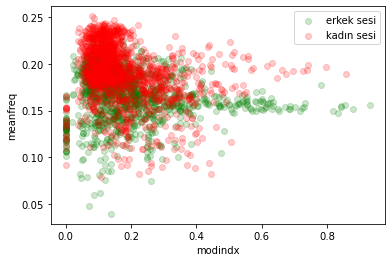

In [6]:
erkek=df[df.label==1]
kadin=df[df.label==0]
plt.scatter(erkek.modindx, erkek.meanfreq, color="green", label="erkek sesi", alpha=0.2)
plt.scatter(kadin.modindx, kadin.meanfreq, color="red", label="kadın sesi", alpha=0.2)
plt.xlabel("modindx")
plt.ylabel("meanfreq")
plt.legend()
plt.show()

In [7]:
#x ve y eksenlerini belirleyelim
y=df.label.values #0 yada 1 olma durumu
x_ham_veri=df.drop(["label"], axis=1) # O ve 1 olma ("outcome") durumu dışındaki özellikler
#Outcome sütununu (depented variable) çıkarıp sadece independent variables bırakıyoruz.
#Çünkü KNN algoritması x değerleri içerisinde guruplandırma yapacak.

#Normalization işlemi yapıyoruz x_ham_veri içerisindeki değerleri sadece 
#0 ve 1 arasında olacak şekilde hepsini güncelliyoruz.
#Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer KNN algoritmasını yanıltabilir.

x= (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

#önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head(1))

#sonra
print("\n\n\nNormalization sonraso yapay zeka eğitim için vereceğimiz veriler:\n")
print(x.head(1))

Normalization öncesi ham veriler:

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   

          kurt    sp.ent       sfm  mode  centroid   meanfun    minfun  \
2  1024.927705  0.846389  0.478905   0.0  0.077316  0.098706  0.015656   

     maxfun  meandom    mindom    maxdom   dfrange   modindx  
2  0.271186  0.00799  0.007812  0.015625  0.007812  0.046512  



Normalization sonraso yapay zeka eğitim için vereceğimiz veriler:

   meanfreq        sd    median       Q25       Q75       IQR      skew  \
2  0.179222  0.675536  0.102873  0.034284  0.385912  0.457148  0.885255   

       kurt    sp.ent       sfm  mode  centroid   meanfun    minfun    maxfun  \
2  0.782275  0.442738  0.548382   0.0  0.179222  0.236945  0.030264  0.954963   

   meandom    mindom    maxdom   dfrange   modindx  
2  0.00006  0.006452  0.000357  0.000358  0.049885  


C:\Users\bskyl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\bskyl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [8]:
#train datamız ile test datamızı ayırıyoruz.
#train datamız sistemin sağlıklı insan ile hasta isanı ayırt etmesini öğrenmek için kullanılacak.
#test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye
#test etmek için kullanılacak.

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.1, random_state=1)

#knn modelimizi oluşturuyoruz.
knn= KNeighborsClassifier(n_neighbors=7 ) 
knn.fit(x_train, y_train)
prediction= knn.predict(x_test)
print("K=7 için test verilerimizin doğrulama testi sonucu ", knn.score(x_test,y_test))

K=7 için test verilerimizin doğrulama testi sonucu  0.9747634069400631


In [9]:
sayac=1
for k in range(1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, " ","Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac+=1

1   Doğruluk oranı: % 96.21451104100946
2   Doğruluk oranı: % 96.84542586750788
3   Doğruluk oranı: % 96.84542586750788
4   Doğruluk oranı: % 97.79179810725552
5   Doğruluk oranı: % 96.84542586750788
6   Doğruluk oranı: % 97.79179810725552
7   Doğruluk oranı: % 97.47634069400631
8   Doğruluk oranı: % 97.79179810725552
9   Doğruluk oranı: % 97.47634069400631
10   Doğruluk oranı: % 97.79179810725552


In [12]:
#Male_data= [0.0597809849598081,0.0642412677031359,0.032026913372582,0.0150714886459209,0.0901934398654331,0.0751219512195122,12.8634618371626,274.402905502067,0.893369416700807,0.491917766397811,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.0078125,0.0078125,0,0]

# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)
 
new_prediction = knn.predict(sc.transform(np.array([[0.0597809849598081,0.0642412677031359,0.032026913372582,0.0150714886459209,0.0901934398654331,0.0751219512195122,12.8634618371626,274.402905502067,0.893369416700807,0.491917766397811,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.0078125,0.0078125,0,0
]])))

if new_prediction[0]==1:
    print("Male")
else:
    print("Famale")


Male


C:\Users\bskyl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\bskyl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
